In [1]:
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys


%matplotlib inline

### Getting a network from user.json

In [83]:
c = 0
friend_list = {}
with open('yelp_academic_dataset_user.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        friends = review['friends']
        #only get nodes with friends (don't want unconnected nodes of degree 0)
        if len(friends)!=0:
            friend_list[uid]=friends
        if c % 100000 == 0:
            print c

100000
200000
300000
400000
500000


In [86]:
network = nx.Graph(friend_list)

In [87]:
print 'hi'

hi


In [ ]:
print(nx.diameter(network))

In [76]:
print "Number of nodes in the graph: ", network.number_of_nodes() 
print "Number of edges in the graph: ", network.number_of_edges() 

# Number of nodes in the graph:  552339
# Number of edges in the graph:  1781932

Number of nodes in the graph:  249441
Number of edges in the graph:  1781932


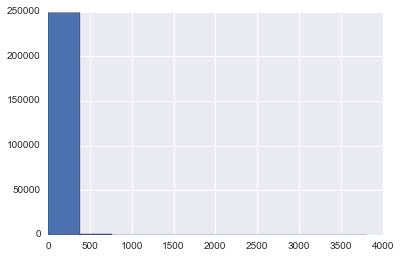

In [77]:
degree_sequence=sorted(nx.degree(network).values()) 
dmax= max(degree_sequence)
h,bins,patches = plt.hist(degree_sequence)

In [79]:
print dmax

3812


In [80]:
print type(degree_sequence)

<type 'list'>


In [81]:
print len(degree_sequence)

249441


In [66]:
print degree_sequence[-500000]

13


In [70]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

x = remove_values_from_list(degree_sequence, 0)
print len(x)

249441


In [71]:
print x[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Getting a network from review.json

In [44]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        bid =  review['business_id']
        user_list[uid].append(bid)
        business_list[bid].append(uid)


        if c % 1000 == 0:
            print c
            break
# print user_list
# print business_list

1000


In [45]:
print len(user_list), len(business_list)

740 68


In [46]:
friends_list = {}


for user in user_list:
    for business in user_list[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_list[business])
        else:
            friends_list[user]=business_list[business]
        

In [47]:

sys.getsizeof(friends_list)

#3146000
#49424


49424

In [48]:
print len(friends_list)

740


In [49]:
review_network = nx.Graph(friends_list)

In [50]:
len(review_network)

740

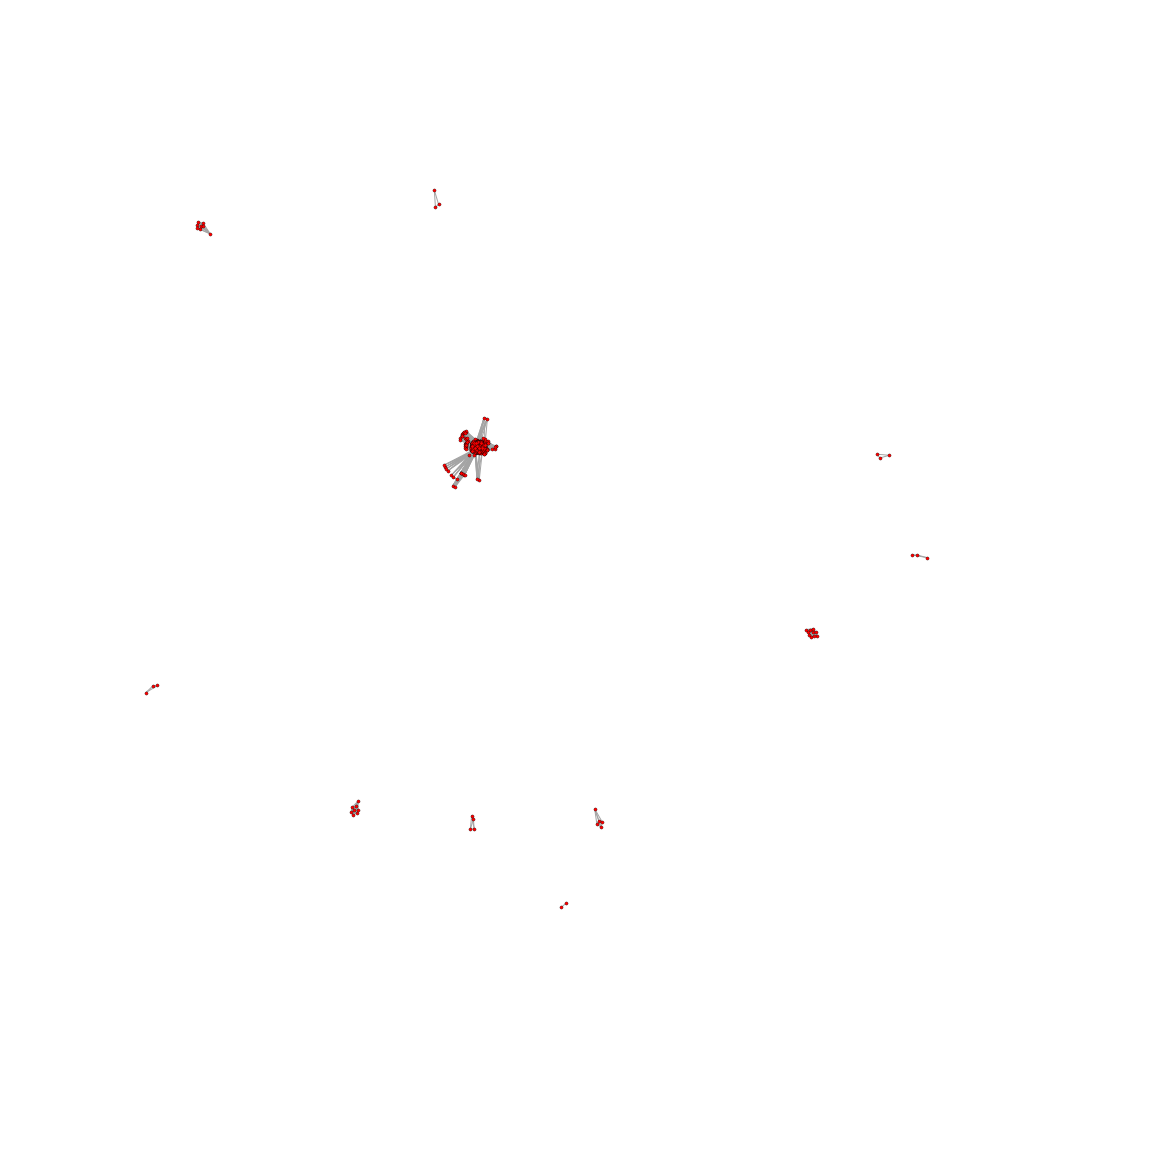

In [51]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(20,20))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', with_labels=False, font_color='#cacaca', node_size=10)
    plt.axis('off')
